In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import joblib

In [3]:
data = pd.read_csv("D:\data science\car_price_prediction.csv")

In [4]:
data.sample(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
13335,45769302,7213,-,HONDA,Cr-v,1997,Jeep,No,Petrol,2,200000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Silver,1
17696,45816434,19444,1091,TOYOTA,Camry,2016,Sedan,Yes,Petrol,2.5,61000 km,4.0,Tiptronic,Front,04-May,Left wheel,Black,6
10905,45757709,627,924,NISSAN,Sentra,2017,Sedan,Yes,Petrol,1.8,0 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
15159,45224267,21012,-,FORD,C-MAX,2015,Sedan,No,Hybrid,2,0 km,4.0,Automatic,Front,04-May,Left wheel,Black,8
10013,45794372,15681,-,TOYOTA,Prius,2010,Hatchback,Yes,LPG,1.8,360000 km,4.0,Variator,Front,04-May,Left wheel,Blue,4


In [5]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [6]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [7]:
data= data.drop('ID',axis='columns')

In [8]:
#to replace the --- value with nan
data['Levy'] = pd.to_numeric(data['Levy'], errors='coerce')
data['Levy'] = data['Levy'].abs()

In [9]:
data.dropna(inplace=True)

In [10]:
data['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'FORD', 'HONDA', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'PORSCHE', 'VOLKSWAGEN', 'AUDI', 'NISSAN', 'BMW',
       'SUBARU', 'DAEWOO', 'SSANGYONG', 'MAZDA', 'GMC', 'KIA', 'INFINITI',
       'FIAT', 'OPEL', 'MITSUBISHI', 'ACURA', 'CITROEN', 'RENAULT',
       'JEEP', 'DODGE', 'MINI', 'CHRYSLER', 'JAGUAR', 'DAIHATSU', 'BUICK',
       'LAND ROVER', 'TESLA', 'CADILLAC', 'SUZUKI', 'LINCOLN', 'BENTLEY',
       'MERCURY', 'VOLVO', 'VAZ', 'MASERATI', 'FERRARI', 'SKODA',
       'LAMBORGHINI', 'PEUGEOT', 'GAZ', 'SCION', 'HUMMER'], dtype=object)

In [11]:
data= data.drop('Model',axis='columns')

In [12]:
data.sample(5)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
18727,706,1399.0,LEXUS,2010,Jeep,Yes,Petrol,3.5,172659 km,6.0,Automatic,4x4,04-May,Left wheel,White,12
13990,13987,640.0,CHEVROLET,2013,Sedan,Yes,Diesel,2,184124 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
10188,10036,639.0,HYUNDAI,2014,Sedan,Yes,LPG,2,493905 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
10916,47076,765.0,SSANGYONG,2015,Jeep,Yes,Diesel,2,118366 km,4.0,Automatic,Front,04-May,Left wheel,White,4
12459,40092,639.0,HYUNDAI,2014,Jeep,Yes,Diesel,2,68725 km,4.0,Automatic,Front,04-May,Left wheel,Red,4


In [13]:
data['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Goods wagon', 'Universal',
       'Minivan', 'Coupe', 'Microbus', 'Cabriolet', 'Pickup'],
      dtype=object)

In [14]:
data['Category']= data['Category'].map({'Jeep':0, 'Hatchback':1, 'Sedan':2, 'Goods wagon':3, 'Universal':4,
       'Minivan':5, 'Coupe':6, 'Microbus':7, 'Cabriolet':8, 'Pickup':9})

In [15]:
data['Leather interior'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
data['Leather interior']= data['Leather interior'].map({'Yes':0, 'No':1})

In [17]:
data.sample(5)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
17639,220,1185.0,FORD,2009,0,0,Hybrid,2.5,193614 km,4.0,Automatic,Front,04-May,Left wheel,White,0
13081,15500,2265.0,TOYOTA,2019,1,1,Hybrid,1.5,5000 km,4.0,Automatic,Front,04-May,Right-hand drive,White,6
6715,26657,919.0,MERCEDES-BENZ,2012,0,0,Diesel,3,271701 km,6.0,Automatic,4x4,04-May,Left wheel,White,12
12212,25387,595.0,HONDA,2015,1,0,Petrol,1.5,73225 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
8705,862,259.0,CHEVROLET,2014,0,0,Hybrid,1.4,133195 km,4.0,Automatic,Front,04-May,Left wheel,Black,0


In [18]:
data['Fuel type'].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'Plug-in Hybrid', 'LPG', 'CNG'],
      dtype=object)

In [19]:
data.sample(5)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
16922,7527,475.0,CHEVROLET,2012,2,1,Petrol,1.4,216000 km,4.0,Manual,Front,04-May,Left wheel,Black,6
15225,2352,586.0,HYUNDAI,2012,2,0,Petrol,1.8,0 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
3137,58579,891.0,HYUNDAI,2016,0,0,Diesel,2,35000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
3413,549,518.0,TOYOTA,2016,0,0,Hybrid,2.5,74053 km,4.0,Automatic,4x4,04-May,Left wheel,Blue,12
5386,6899,1273.0,TOYOTA,2015,2,0,Petrol,3.5,122418 km,6.0,Automatic,Front,04-May,Left wheel,Blue,12


In [20]:
data.columns

Index(['Price', 'Levy', 'Manufacturer', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [21]:
data['Fuel type']= data['Fuel type'].map({'Hybrid':0, 'Petrol':1, 'Diesel':2, 'Plug-in Hybrid':3, 'LPG':4, 'CNG':5})

In [22]:
data['Engine volume'].unique()

array(['3.5', '3', '2.5', '1.3', '2', '1.8', '2.4', '3.3', '1.6', '4.7',
       '2.0 Turbo', '1.4 Turbo', '3.6', '4', '1.5', '1.6 Turbo', '2.2',
       '1.4', '5.5', '3.8', '4.6', '2.3', '5', '2.9', '1.8 Turbo',
       '2.4 Turbo', '2.7', '4.8', '5.3', '0.4', '2.1', '1.7', '0.7',
       '3.2', '2.2 Turbo', '4.4', '1.3 Turbo', '3.0 Turbo', '1',
       '4.4 Turbo', '1.9', '2.5 Turbo', '0.8', '1.5 Turbo', '3.5 Turbo',
       '5.7', '1.2', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '2.9 Turbo', '0', '1.9 Turbo', '3.7', '20',
       '2.7 Turbo', '5.5 Turbo', '0.2', '5.6', '2.8', '4.7 Turbo', '6.8',
       '6', '7.3', '3.6 Turbo', '4.5 Turbo', '0.8 Turbo', '4.5', '5.4',
       '2.8 Turbo', '6.4', '6.3', '3.9', '4.2', '0.1', '1.1', '2.3 Turbo',
       '4.3', '0.7 Turbo', '1.0 Turbo', '2.6', '2.1 Turbo', '5.2',
       '3.7 Turbo'], dtype=object)

In [23]:
data['Engine volume']= data['Engine volume'].map({'3.5':0, '3':1, '2.5':2, '1.3':3, '2':4, '1.8':5, '2.4':6, '3.3':7, '1.6':8, '4.7':9,
       '2.0 Turbo':10, '1.4 Turbo':11, '3.6':12, '4':13, '1.5':14, '1.6 Turbo':15, '2.2':16,
       '1.4':17, '5.5':18, '3.8':19, '4.6':20, '2.3':21, '5':22, '2.9':23, '1.8 Turbo':24,
       '2.4 Turbo':25, '2.7':26, '4.8':27, '5.3':28, '0.4':29, '2.1':30, '1.7':31, '0.7':32,
       '3.2':33, '2.2 Turbo':34, '4.4':35, '1.3 Turbo':36, '3.0 Turbo':37, '1':38,
       '4.4 Turbo':39, '1.9':40, '2.5 Turbo':41, '0.8':42, '1.5 Turbo':43, '3.5 Turbo':44,
       '5.7':45, '1.2':46, '4.6 Turbo':47, '6.7':48, '6.2':49, '1.2 Turbo':50, '3.4':51,
       '1.7 Turbo':52, '2.9 Turbo':53, '0':54, '1.9 Turbo':55, '3.7':56, '20':58,
       '2.7 Turbo':59, '5.5 Turbo':60, '0.2':61, '5.6':62, '2.8':63, '4.7 Turbo':64, '6.8':65,
       '6':66, '7.3':67, '3.6 Turbo':68, '4.5 Turbo':69, '0.8 Turbo':70, '4.5':71, '5.4':72,
       '2.8 Turbo':73, '6.4':74, '6.3':75, '3.9':76, '4.2':77, '0.1':78, '1.1':79, '2.3 Turbo':80,
       '4.3':81, '0.7 Turbo':82, '1.0 Turbo':83, '2.6':84, '2.1 Turbo':85, '5.2':86,
       '3.7 Turbo':87});

In [24]:
# Remove strings and extract integers using regular expressions
data['Mileage'] = data['Mileage'].str.extract(r'(\d+)').astype(float)

In [25]:
data['Gear box type'].unique()

array(['Automatic', 'Tiptronic', 'Manual', 'Variator'], dtype=object)

In [26]:
data['Gear box type']= data['Gear box type'].map({'Automatic':0, 'Tiptronic':1, 'Manual':2, 'Variator':3})

In [27]:
data.sample(5)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
7208,18669,862.0,HYUNDAI,2011,5,0,2,2,65564.0,4.0,0,Front,04-May,Left wheel,Silver,4
9225,3136,781.0,TOYOTA,2012,2,0,0,2,159379.0,4.0,0,Front,04-May,Left wheel,White,12
18994,24543,642.0,HYUNDAI,2012,0,0,2,4,151995.0,4.0,0,Front,04-May,Left wheel,Grey,4
715,6144,1282.0,CHEVROLET,2007,0,0,2,4,68075.0,4.0,0,Front,04-May,Left wheel,Silver,4
6264,7056,915.0,BMW,2014,0,0,2,1,141384.0,6.0,0,4x4,04-May,Left wheel,Blue,0


In [28]:
data['Drive wheels'].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

In [29]:
data['Drive wheels']= data['Drive wheels'].map({'4x4':0, 'Front':1, 'Rear':2})

In [30]:
data.sample(5)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
14859,157,531.0,NISSAN,2012,0,0,1,8,190454.0,4.0,0,0,04-May,Left wheel,Black,0
18776,18817,900.0,HYUNDAI,2015,2,1,1,6,130000.0,4.0,0,1,04-May,Left wheel,Silver,10
7332,13172,765.0,FORD,2015,1,1,1,4,217600.0,4.0,0,1,04-May,Left wheel,White,8
14869,2430,1598.0,MERCEDES-BENZ,2008,2,0,2,1,175614.0,6.0,0,2,04-May,Left wheel,Black,12
14361,8467,639.0,HYUNDAI,2014,2,0,4,4,587027.0,4.0,0,1,04-May,Left wheel,Orange,4


In [31]:
data['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [32]:
data= data.drop('Doors',axis='columns')

In [33]:
data.sample(5)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
6364,4077,1363.0,LEXUS,2012,0,0,1,20,150909.0,8.0,0,0,Left wheel,Black,0
7587,9800,790.0,CHEVROLET,2009,2,0,1,8,219236.0,4.0,0,1,Left wheel,Black,4
4107,470,585.0,TOYOTA,2013,1,1,0,5,0.0,4.0,0,1,Left wheel,Black,0
2844,5645,1324.0,TOYOTA,2010,0,0,0,7,264877.0,6.0,0,0,Left wheel,White,12
16648,1490,1399.0,MERCEDES-BENZ,2010,2,0,1,0,249734.0,6.0,0,0,Left wheel,Blue,12


In [34]:
data['Wheel'].unique()

array(['Left wheel', 'Right-hand drive'], dtype=object)

In [35]:
data['Wheel']= data['Wheel'].map({'Left wheel':0, 'Right-hand drive':1})

In [36]:
data['Color'].unique()

array(['Silver', 'Black', 'White', 'Grey', 'Blue', 'Red', 'Sky blue',
       'Orange', 'Green', 'Yellow', 'Brown', 'Beige', 'Carnelian red',
       'Golden', 'Pink', 'Purple'], dtype=object)

In [37]:
data['Color']= data['Color'].map({'Silver':0, 'Black':1, 'White':2, 'Grey':3, 'Blue':4, 'Red':5, 'Sky blue':6,
       'Orange':7, 'Green':8, 'Yellow':9, 'Brown':10, 'Beige':11, 'Carnelian red':12,
       'Golden':13, 'Pink':14, 'Purple':15})

In [38]:
data.sample(5)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
11934,1646,1750.0,TOYOTA,2008,0,0,0,7,269162.0,6.0,0,0,0,0,12
2760,12544,639.0,FORD,2014,1,1,1,4,103318.0,4.0,0,1,0,0,0
6758,10036,988.0,TOYOTA,2007,2,0,0,14,170000.0,4.0,3,1,0,5,10
5640,13172,891.0,HYUNDAI,2016,2,0,4,4,516176.0,4.0,0,1,0,7,4
11002,25889,629.0,HYUNDAI,2015,2,0,1,8,103891.0,4.0,0,1,0,2,4


In [39]:
data['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'FORD', 'HONDA', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'PORSCHE', 'VOLKSWAGEN', 'AUDI', 'NISSAN', 'BMW',
       'SUBARU', 'DAEWOO', 'SSANGYONG', 'MAZDA', 'GMC', 'KIA', 'INFINITI',
       'FIAT', 'OPEL', 'MITSUBISHI', 'ACURA', 'CITROEN', 'RENAULT',
       'JEEP', 'DODGE', 'MINI', 'CHRYSLER', 'JAGUAR', 'DAIHATSU', 'BUICK',
       'LAND ROVER', 'TESLA', 'CADILLAC', 'SUZUKI', 'LINCOLN', 'BENTLEY',
       'MERCURY', 'VOLVO', 'VAZ', 'MASERATI', 'FERRARI', 'SKODA',
       'LAMBORGHINI', 'PEUGEOT', 'GAZ', 'SCION', 'HUMMER'], dtype=object)

In [40]:
data['Manufacturer']= data['Manufacturer'].map({'LEXUS':0, 'CHEVROLET':1, 'FORD':2, 'HONDA':3, 'HYUNDAI':4, 'TOYOTA':5,
       'MERCEDES-BENZ':6, 'PORSCHE':7, 'VOLKSWAGEN':8, 'AUDI':9, 'NISSAN':10, 'BMW':11,
       'SUBARU':12, 'DAEWOO':13, 'SSANGYONG':14, 'MAZDA':15, 'GMC':16, 'KIA':17, 'INFINITI':18,
       'FIAT':19, 'OPEL':20, 'MITSUBISHI':21, 'ACURA':22, 'CITROEN':23, 'RENAULT':24,
       'JEEP':25, 'DODGE':26, 'MINI':27, 'CHRYSLER':28, 'JAGUAR':29, 'DAIHATSU':30, 'BUICK':31,
       'LAND ROVER':32, 'TESLA':33, 'CADILLAC':34, 'SUZUKI':35, 'LINCOLN':36, 'BENTLEY':37,
       'MERCURY':38, 'VOLVO':39, 'VAZ':40, 'MASERATI':41, 'FERRARI':42, 'SKODA':43,
       'LAMBORGHINI':44, 'PEUGEOT':45, 'GAZ':46, 'SCION':47, 'HUMMER':48})

In [41]:
data.sample(5)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
14538,11807,836.0,14,2010,2,0,2,4,233503.0,4.0,0,1,0,0,4
11345,26804,640.0,4,2013,0,0,2,4,52326.0,4.0,0,1,0,3,4
12679,3450,1624.0,6,2009,2,0,2,0,109139.0,6.0,0,2,0,1,12
13946,3293,891.0,0,2016,6,0,1,4,66776.0,4.0,0,2,0,2,12
13770,157,915.0,9,2014,1,0,1,1,401128.0,6.0,0,0,0,3,0


In [42]:
x=data.drop('Price', axis='columns')

In [43]:
x.head(5)

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,1399.0,0,2010,0,0,0,0,186005.0,6.0,0,0,0,0,12
1,1018.0,1,2011,0,1,1,1,192000.0,6.0,1,0,0,1,8
3,862.0,2,2011,0,0,0,2,168966.0,4.0,0,0,0,2,0
4,446.0,3,2014,1,0,1,3,91901.0,4.0,0,1,0,0,4
5,891.0,4,2016,0,0,2,4,160931.0,4.0,0,1,0,2,4


In [44]:
y=data['Price']

In [45]:
y.head(5)

0    13328
1    16621
3     3607
4    11726
5    39493
Name: Price, dtype: int64

In [46]:
# splitting test set and training set

from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42)

In [48]:
len('x_train')

7

In [49]:
x_train.count()

Levy                10734
Manufacturer        10734
Prod. year          10734
Category            10734
Leather interior    10734
Fuel type           10734
Engine volume       10734
Mileage             10734
Cylinders           10734
Gear box type       10734
Drive wheels        10734
Wheel               10734
Color               10734
Airbags             10734
dtype: int64

In [50]:
data.count()

Price               13418
Levy                13418
Manufacturer        13418
Prod. year          13418
Category            13418
Leather interior    13418
Fuel type           13418
Engine volume       13418
Mileage             13418
Cylinders           13418
Gear box type       13418
Drive wheels        13418
Wheel               13418
Color               13418
Airbags             13418
dtype: int64

In [51]:
x_test.count()

Levy                2684
Manufacturer        2684
Prod. year          2684
Category            2684
Leather interior    2684
Fuel type           2684
Engine volume       2684
Mileage             2684
Cylinders           2684
Gear box type       2684
Drive wheels        2684
Wheel               2684
Color               2684
Airbags             2684
dtype: int64

In [52]:
data.count()

Price               13418
Levy                13418
Manufacturer        13418
Prod. year          13418
Category            13418
Leather interior    13418
Fuel type           13418
Engine volume       13418
Mileage             13418
Cylinders           13418
Gear box type       13418
Drive wheels        13418
Wheel               13418
Color               13418
Airbags             13418
dtype: int64

In [53]:
y_test.count()

2684

In [54]:
y_train.count()

10734

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR     #supervised learning algorith aka support vector machine
from sklearn.ensemble import RandomForestRegressor     
from sklearn.ensemble import GradientBoostingRegressor

In [56]:
lr= LinearRegression()

In [57]:
lr.fit(x_train, y_train)

LinearRegression()

In [58]:
svm=SVR()

In [59]:
svm.fit(x_train,y_train)

SVR()

In [60]:
rf = RandomForestRegressor()

In [61]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [62]:
RandomForestRegressor()

RandomForestRegressor()

In [63]:
gr= svm.fit(x_train, y_train)

In [64]:
gr.fit(x_train, y_train)

SVR()

In [65]:
#predicting data sets
y_pred1= lr.predict(x_test)

In [66]:
y_pred2=svm.predict(x_test)

In [67]:
y_pred3= rf.predict(x_test)

In [68]:
x_test.head()

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
11598,502.0,3,2013,1,0,1,14,55000.0,4.0,0,1,0,13,4
16349,502.0,5,2013,1,0,0,14,142000.0,4.0,0,1,0,4,8
7147,1384.0,6,2014,2,0,1,64,124893.0,8.0,1,0,0,1,12
12594,1172.0,6,2011,2,0,2,0,132630.0,6.0,0,2,0,0,12
9942,765.0,4,2015,0,0,2,4,100369.0,4.0,0,1,0,2,4


In [69]:
y_pred4= gr.predict(x_test)

In [70]:
df1= pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

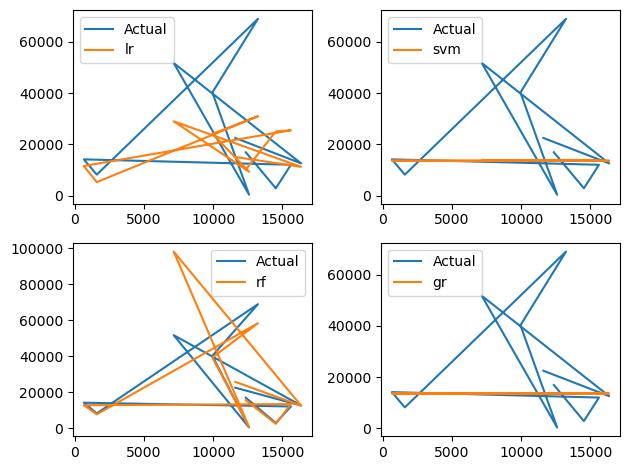

In [71]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label="lr")
plt.legend()


plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svm")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")
plt.tight_layout()
plt.legend()

In [72]:
#predicting price through metrices

score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)
print(score1,score2,score3,score4)

0.16990248427495191 -0.043260936738899636 0.7553959405566312 -0.043260936738899636


In [73]:
data.columns

Index(['Price', 'Levy', 'Manufacturer', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [74]:
data={ 'Levy':502, 'Manufacturer':3, 'Prod. year':2013, 'Category':1,
       'Leather interior':0, 'Fuel type':1, 'Engine volume':14, 'Mileage':55000,
       'Cylinders':4, 'Gear box type':0, 'Drive wheels':1, 'Wheel':0, 'Color':13,
       'Airbags':4}

In [75]:
df= pd.DataFrame(data,index=[0])
df

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,502,3,2013,1,0,1,14,55000,4,0,1,0,13,4


In [76]:
new_pred = rf.predict(df)

In [77]:
print("the price of car is:",new_pred[0])

the price of car is: 25721.54
